In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
myseed = 69
np.random.seed(myseed)

In [2]:
iris = datasets.load_iris()
data = iris.data
target = iris.target
print(data.shape)
print(type(data))
print(target)

(150, 4)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
def draw_scatter_pic(data):
    plt.figure(figsize=(10,8))

    plt.subplot(321) 
    plt.title('Sepal Length v.s Sepal Width')
    plt.scatter(data[:,0], data[:,1], c='red')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

    plt.subplot(322) 
    plt.title('Sepal Length v.s Petal Length')
    plt.scatter(data[:,0], data[:,2])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')

    plt.subplot(323) 
    plt.title('Sepal Length v.s Petal Width')
    plt.scatter(data[:,0], data[:,3])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Width')

    plt.subplot(324) 
    plt.title('Sepal Width v.s Petal Length')
    plt.scatter(data[:,1], data[:,2])
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Length')

    plt.subplot(325) 
    plt.title('Sepal Width v.s Petal Width')
    plt.scatter(data[:,1], data[:,3])
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Width')

    plt.subplot(326) 
    plt.title('Petal Length v.s Petal Width')
    plt.scatter(data[:,2], data[:,3])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

    plt.tight_layout()
    plt.show()

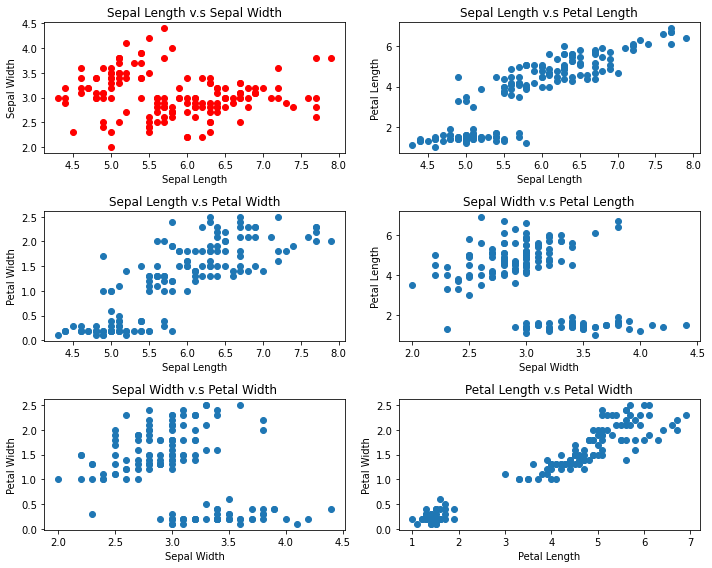

In [4]:
draw_scatter_pic(data)

In [7]:
from sklearn import preprocessing

Min_max_normalization = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_normalization = Min_max_normalization.fit_transform(data)
check_max = np.max(data_normalization, axis = 0)
check_min = np.min(data_normalization, axis = 0)
print(check_max, check_min)

[1. 1. 1. 1.] [0. 0. 0. 0.]


In [8]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import random
num = random.randint(0, 100)
data_normalization = sm.add_constant(data_normalization)
train_data, test_data, train_label, test_label = train_test_split(data_normalization, target, test_size=0.2, random_state = num, shuffle = True)

model = sm.OLS(train_label, train_data)
ols_fit_line = model.fit()

In [9]:
print(ols_fit_line.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     379.8
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           2.89e-65
Time:                        13:39:12   Log-Likelihood:                 14.105
No. Observations:                 120   AIC:                            -18.21
Df Residuals:                     115   BIC:                            -4.273
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0387      0.087     -0.443      0.6

In [ ]:
# train_pred = ols_fit_line.predict(train_data)
# print(train_pred)

In [10]:
pred = ols_fit_line.predict(test_data)
print(pred)

[ 2.1233563  -0.08415656  0.87103407  1.05700315  1.96639537 -0.04785557
  2.25461594  1.79336297  1.92414453  1.12702227 -0.00585923  1.36662427
 -0.07961505  1.68889486 -0.05975528 -0.02247239  2.03076558  1.22615611
 -0.19328821  1.71163843  1.12664738  1.43947218  1.58914023  0.86907542
  1.68889486  1.47737066  0.19322357  1.20788525  0.10676839  1.31806245]


In [11]:
pred_ans = []
for i in range(pred.shape[0]):
    if pred[i] <= 0.5:
        pred_ans.append(0)
    elif 0.5 < pred[i] < 1.5 :
        pred_ans.append(1)
    elif 1.5 <= pred[i] :
        pred_ans.append(2)

count = 0
for idx in range(len(pred_ans)):
    if test_label[idx] == pred_ans[idx]: # 檢查預測跟原先標籤是否一樣
        count += 1
    else:
        continue
print(count/len(pred_ans)) # 測試集有多少比例預測正確

0.9333333333333333


In [12]:
import time
items = 10
now = time.strftime("%H:%M:%S", time.localtime()) 
print('{:0>3d}/100 Experiments: Start at {:}'.format(items, now))

010/100 Experiments: Start at 13:47:05


In [13]:
import numpy as np
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm
import random
import datetime

myseed = 69
np.random.seed(myseed)

def draw_scatter_pic(data):
    plt.figure(figsize=(10,8))

    plt.subplot(321) 
    plt.title('Sepal Length v.s Sepal Width')
    plt.scatter(data[:,0], data[:,1], c='#1f77b4')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

    plt.subplot(322) 
    plt.title('Sepal Length v.s Petal Length')
    plt.scatter(data[:,0], data[:,2])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')

    plt.subplot(323) 
    plt.title('Sepal Length v.s Petal Width')
    plt.scatter(data[:,0], data[:,3])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Width')

    plt.subplot(324) 
    plt.title('Sepal Width v.s Petal Length')
    plt.scatter(data[:,1], data[:,2])
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Length')

    plt.subplot(325) 
    plt.title('Sepal Width v.s Petal Width')
    plt.scatter(data[:,1], data[:,3])
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Width')

    plt.subplot(326) 
    plt.title('Petal Length v.s Petal Width')
    plt.scatter(data[:,2], data[:,3])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

    plt.tight_layout()
    plt.show()

    
iris = datasets.load_iris()
data = iris.data
target = iris.target
# draw_scatter_pic(data)

Min_max_normalization = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_normalization = Min_max_normalization.fit_transform(data)

items = 1
final = []
setosa_correct = []
versicolor_correct = []
virginica_correct = []
all_setosa = 0
all_versicolor = 0
all_virginica = 0
while True:
    now = datetime.datetime.now()
    print('{:0>3d}/100 Experiments: Start at {:}'.format(items, now))
    num = random.randint(0, 1000)
    data_normalization_const = sm.add_constant(data_normalization)
    train_data, test_data, train_label, test_label = train_test_split(data_normalization_const, target, 
                                                    test_size=0.2, random_state = num, shuffle = True)
    model = sm.OLS(train_label, train_data)
    ols_fit_line = model.fit()
    # print(ols_fit_line.summary())
    
    pred = ols_fit_line.predict(test_data)

    pred_ans = []
    pred_setosa = 0
    pred_versicolor = 0 
    pred_virginica = 0
    for i in range(pred.shape[0]):
        if pred[i] <= 0.5:
            pred_ans.append(0)
            pred_setosa += 1
        elif 0.5 < pred[i] < 1.5 :
            pred_ans.append(1)
            pred_versicolor += 1
        elif 1.5 <= pred[i] :
            pred_ans.append(2)
            pred_virginica += 1
                  
    all_setosa += pred_setosa
    all_versicolor += pred_versicolor
    all_virginica += pred_virginica
    
    count = 0
    pred_setosa_correct = 0
    pred_versicolor_correct = 0 
    pred_virginica_correct = 0
    for idx in range(len(pred_ans)):       
        if test_label[idx] == pred_ans[idx]: # 檢查預測跟原先標籤是否一樣
            count += 1
            if test_label[idx] == 0:
                pred_setosa_correct += 1
            elif test_label[idx] == 1:
                pred_versicolor_correct += 1
            elif test_label[idx] == 2:
                pred_virginica_correct += 1
        else:
            continue
    final.append(count/len(pred_ans)) # 測試集有多少比例預測正確，一一添加至列表
    setosa_correct.append(pred_setosa_correct/pred_setosa)
    versicolor_correct.append(pred_versicolor_correct/pred_versicolor)
    virginica_correct.append(pred_virginica_correct/pred_virginica)
    if items == 100:
        break
    else:
        items += 1
# print(final)

001/100 Experiments: Start at 2021-09-09 13:47:05.881655
002/100 Experiments: Start at 2021-09-09 13:47:05.884648
003/100 Experiments: Start at 2021-09-09 13:47:05.886644
004/100 Experiments: Start at 2021-09-09 13:47:05.890633
005/100 Experiments: Start at 2021-09-09 13:47:05.892628
006/100 Experiments: Start at 2021-09-09 13:47:05.894622
007/100 Experiments: Start at 2021-09-09 13:47:05.895620
008/100 Experiments: Start at 2021-09-09 13:47:05.898609
009/100 Experiments: Start at 2021-09-09 13:47:05.901601
010/100 Experiments: Start at 2021-09-09 13:47:05.903597
011/100 Experiments: Start at 2021-09-09 13:47:05.906588
012/100 Experiments: Start at 2021-09-09 13:47:05.909579
013/100 Experiments: Start at 2021-09-09 13:47:05.912572
014/100 Experiments: Start at 2021-09-09 13:47:05.914568
015/100 Experiments: Start at 2021-09-09 13:47:05.916563
016/100 Experiments: Start at 2021-09-09 13:47:05.917560
017/100 Experiments: Start at 2021-09-09 13:47:05.919555
018/100 Experiments: Start at 2

In [14]:
final = np.array(final)
ols_correct_mean = np.mean(final, axis=0)
ols_correct_std = np.std(final, axis=0)
print(ols_correct_mean)
print(ols_correct_std)

0.9600000000000003
0.032317865716108854


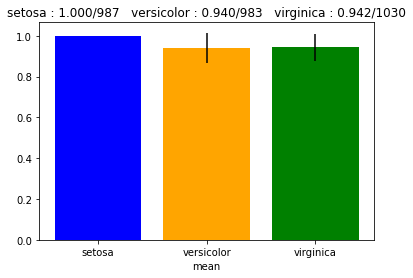

In [15]:
def draw_error_plot(setosa_correct, versicolor_correct, virginica_correct, all_setosa, all_versicolor, all_virginica):
#'''0 - Setosa、 1 - Versicolor、2 - Virginica ，畫 error bar'''
    setosa_correct = np.array(setosa_correct)
    setosa_mean = np.mean(setosa_correct, axis = 0)
    setosa_std = np.std(setosa_correct, axis = 0)

    versicolor_correct = np.array(versicolor_correct)
    versicolor_mean = np.mean(versicolor_correct, axis = 0)
    versicolor_std = np.std(versicolor_correct, axis = 0)

    virginica_correct = np.array(virginica_correct)
    virginica_mean = np.mean(virginica_correct, axis = 0)
    virginica_std = np.std(virginica_correct, axis = 0)

    labels = ['setosa', 'versicolor', 'virginica']
    std = [setosa_std, versicolor_std, virginica_std]
    y = [setosa_mean, versicolor_mean, virginica_mean]
    x = np.arange(len(labels))

    plt.title('setosa : {:.3f}/{}   versicolor : {:.3f}/{}   virginica : {:.3f}/{}'
              .format(setosa_mean, all_setosa, versicolor_mean, all_versicolor, virginica_mean, all_virginica))
    plt.xlabel('mean')
    plt.bar(x, y, color=['blue','orange','green'], yerr=std, tick_label=labels)
    plt.show()

draw_error_plot(setosa_correct, versicolor_correct, virginica_correct, all_setosa, all_versicolor, all_virginica)

In [20]:
test = ols_fit_line.predict()
print(test)

[ 8.35446587e-01  1.45127313e-02  1.32139021e+00 -9.19141581e-02
 -2.78707232e-02  1.31767365e+00  2.04806096e+00  1.72512975e+00
  4.55471295e-02  1.27582092e+00  9.09555740e-01  1.65385262e+00
 -7.29775807e-02  1.72512975e+00  8.78186189e-01 -1.01755665e-01
  1.77556549e+00  1.21319276e+00  1.10699008e+00  1.87787237e+00
  1.96992261e+00  1.29701148e+00  1.00184653e+00  1.05980382e+00
  1.57158257e+00 -1.55139015e-01  1.24177760e+00  2.48213265e-02
  1.75426166e+00  1.62039737e-01  1.37774281e-01  1.64823589e+00
  1.74322909e+00  1.30227905e+00 -9.13361281e-02  5.57897567e-02
  1.19874782e+00  2.01591176e-01  1.17536458e+00  1.83938851e+00
  1.39757877e+00  1.15244843e+00 -1.19984605e-01  9.91426995e-01
  1.16784535e+00  1.13860018e+00  2.02799317e+00 -4.68732686e-02
 -7.03165008e-03  2.19210143e-02  1.52953427e+00 -3.04148880e-02
  1.13157223e-03  2.21825978e+00  1.03601946e+00  1.16204706e+00
 -1.73402454e-02  1.79023611e+00 -1.17730620e-01 -4.97052840e-02
  1.15198367e+00  1.25456

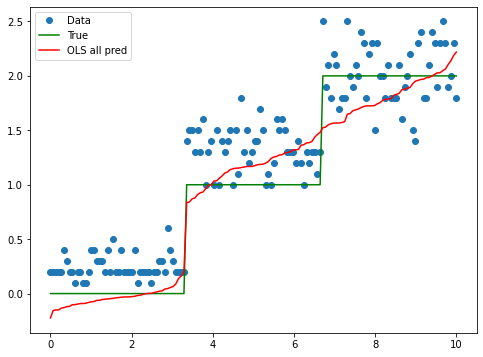

In [86]:
# plot fit all data line
all_pred = ols_fit_line.predict(data_normalization_const)
x_axis = np.linspace(0, 10, len(data_normalization_const))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_axis, data[:, 3], "o", label="feature")
ax.plot(x_axis, target, "g-", label="True")
ax.plot(x_axis, np.sort(all_pred), "r", label="OLS all pred")
ax.legend()

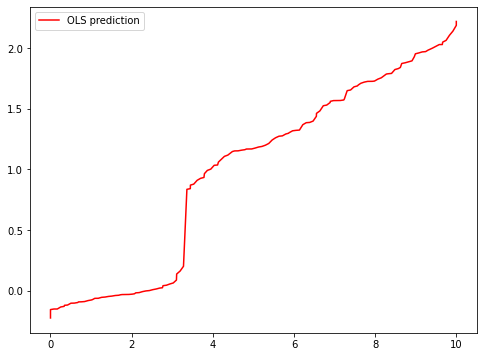

In [52]:
# plot fit line (我這邊先分開在合併，但我發現整個資料直接丟進去結果相同)
train_pred = ols_fit_line.predict(train_data)
train_pred = np.sort(train_pred)
test_pred = ols_fit_line.predict(test_data)
test_pred = np.sort(test_pred)

fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(0, 10, len(train_pred))
x1 = np.linspace(0, 10, len(test_pred))

ax.plot(np.sort(np.hstack((x, x1))), np.sort(np.hstack((train_pred, test_pred))), "r", label="OLS prediction")
# ax.plot(x, train_data, "o", label="train data")
# ax.plot(x1, test_data, "x", label="test data")
ax.legend(loc="best")

In [ ]:
import pickle

combine = {'data': data, 'target': target, 'ols_correct_mean': ols_correct_mean, 'ols_correct_std': ols_correct_std}

with open('summer_training_Q2.pickle', 'wb') as f:
    pickle.dump(combine, f)